In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
from chart_studio import plotly as py #visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object
import os
# import warnings library
import warnings        
# ignore filters
warnings.filterwarnings("ignore") # if there is a warning after some codes, this will avoid us to see them.
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# Any results you write to the current directory are saved as output.

In [96]:
data = pd.read_csv('C:/Users/user/공공빅데이터_프로젝트/2019_2022_수소차_현황.csv', encoding = "euc-kr")

In [97]:
df = pd.DataFrame(data)
df.head()

,Date,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,Count
0,2019-01-01,82,0,2,6,203,1,346,3,8,0,0,61,2,1,0,203,0,918
1,2019-02-01,105,4,2,6,203,1,345,3,10,0,0,61,2,1,0,235,0,978
2,2019-03-01,131,4,2,6,238,1,345,3,18,0,0,61,1,1,0,268,0,1079
3,2019-04-01,143,8,4,6,304,19,530,3,38,0,0,62,1,2,1,321,0,1442
4,2019-05-01,146,97,4,7,324,28,728,4,103,0,2,89,1,3,2,363,0,1901


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    42 non-null     object
 1   서울      42 non-null     object
 2   부산      42 non-null     int64 
 3   대구      42 non-null     int64 
 4   인천      42 non-null     int64 
 5   광주      42 non-null     int64 
 6   대전      42 non-null     int64 
 7   울산      42 non-null     object
 8   세종      42 non-null     int64 
 9   경기      42 non-null     object
 10  강원      42 non-null     int64 
 11  충북      42 non-null     int64 
 12  충남      42 non-null     int64 
 13  전북      42 non-null     int64 
 14  전남      42 non-null     int64 
 15  경북      42 non-null     int64 
 16  경남      42 non-null     int64 
 17  제주      42 non-null     int64 
 18  Count   42 non-null     int64 
dtypes: int64(15), object(4)
memory usage: 6.4+ KB


In [99]:
df['Count'] = df['Count'].astype(float, errors = 'raise')

In [100]:
df["Date"] = pd.to_datetime(df['Date'])

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    42 non-null     datetime64[ns]
 1   서울      42 non-null     object        
 2   부산      42 non-null     int64         
 3   대구      42 non-null     int64         
 4   인천      42 non-null     int64         
 5   광주      42 non-null     int64         
 6   대전      42 non-null     int64         
 7   울산      42 non-null     object        
 8   세종      42 non-null     int64         
 9   경기      42 non-null     object        
 10  강원      42 non-null     int64         
 11  충북      42 non-null     int64         
 12  충남      42 non-null     int64         
 13  전북      42 non-null     int64         
 14  전남      42 non-null     int64         
 15  경북      42 non-null     int64         
 16  경남      42 non-null     int64         
 17  제주      42 non-null     int64         
 18  Count   42 n

In [102]:
df.head()

,Date,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,Count
0,2019-01-01,82,0,2,6,203,1,346,3,8,0,0,61,2,1,0,203,0,918.0
1,2019-02-01,105,4,2,6,203,1,345,3,10,0,0,61,2,1,0,235,0,978.0
2,2019-03-01,131,4,2,6,238,1,345,3,18,0,0,61,1,1,0,268,0,1079.0
3,2019-04-01,143,8,4,6,304,19,530,3,38,0,0,62,1,2,1,321,0,1442.0
4,2019-05-01,146,97,4,7,324,28,728,4,103,0,2,89,1,3,2,363,0,1901.0


In [103]:
df.tail()

,Date,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,Count
37,2022-02-01,2443,1397,318,1071,964,872,2355,132,3634,1824,972,796,1350,364,56,1744,3,20295.0
38,2022-03-01,2432,1434,322,1101,976,892,2387,142,3669,1857,993,836,1385,383,58,1812,4,20683.0
39,2022-04-01,2435,1473,352,1139,1018,1045,2395,205,4004,1959,1095,908,1435,448,77,1899,5,21892.0
40,2022-05-01,2583,1539,372,1189,1029,1156,2393,209,4430,2049,1170,990,1470,498,93,1955,4,23129.0
41,2022-06-01,2665,1599,389,1246,1019,1172,2393,209,4733,2175,1246,1048,1493,541,110,2075,6,24119.0


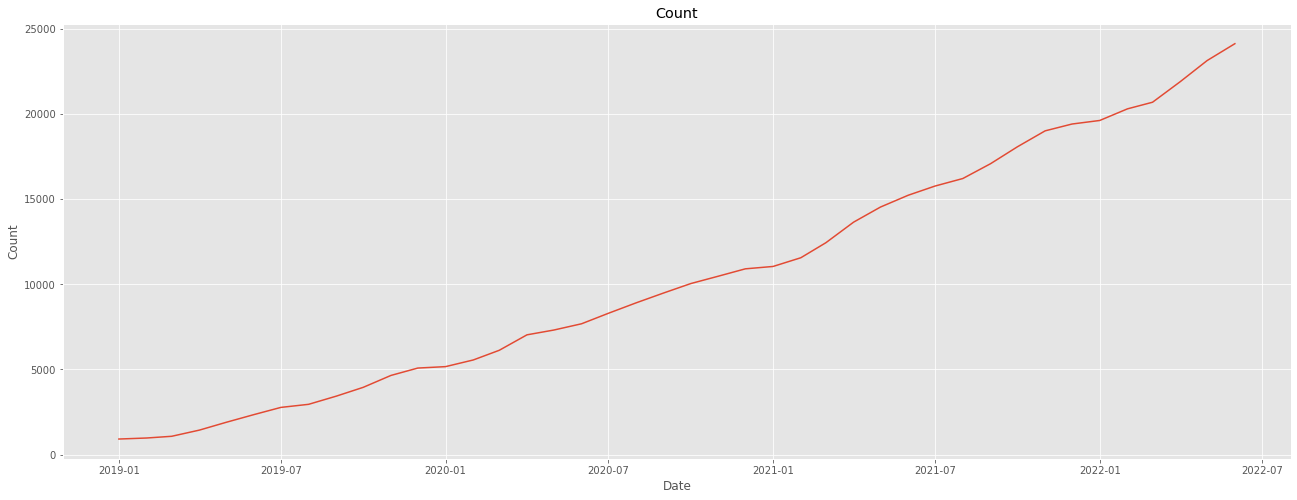

In [104]:
plt.figure(figsize = (22,8))
plt.plot(df.Date, df.Count)
plt.title("Count")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

In [105]:
timeSeries = df.loc[:, ["Date", "Count"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date", axis =1)
ts

,Count
Date,
2019-01-01,918.0
2019-02-01,978.0
2019-03-01,1079.0
2019-04-01,1442.0
2019-05-01,1901.0
2019-06-01,2353.0
2019-07-01,2774.0
2019-08-01,2955.0
2019-09-01,3436.0


<Figure size 432x288 with 0 Axes>

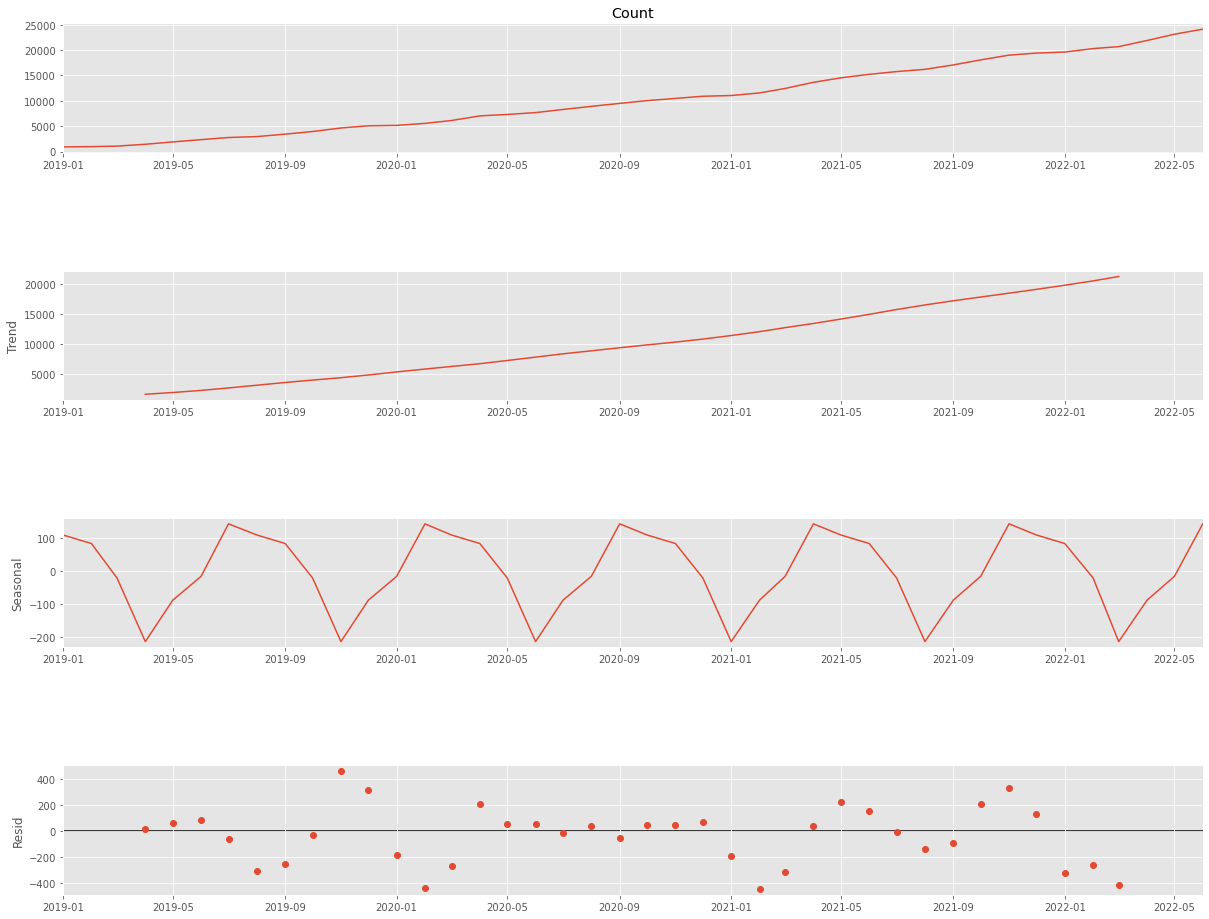

In [113]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts["Count"], model = 'additive', period = 7)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

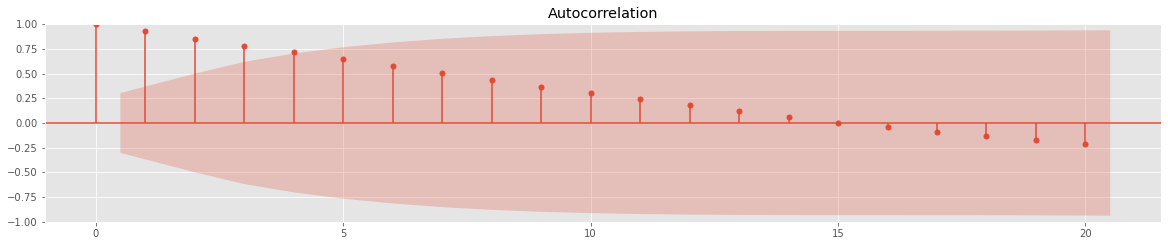

In [114]:
import statsmodels.api as sm

fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=20, ax=ax1)

In [115]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print("ADF Statistic : %f" % result[0])
print('p-value : %f' % result[1])
print('Critical Values : ')
for key, value in result[4].items() :
    print('\t%s : %.3f' % (key,value))

ADF Statistic : 3.699229
p-value : 1.000000
Critical Values : 
	1% : -3.616
	5% : -2.941
	10% : -2.609


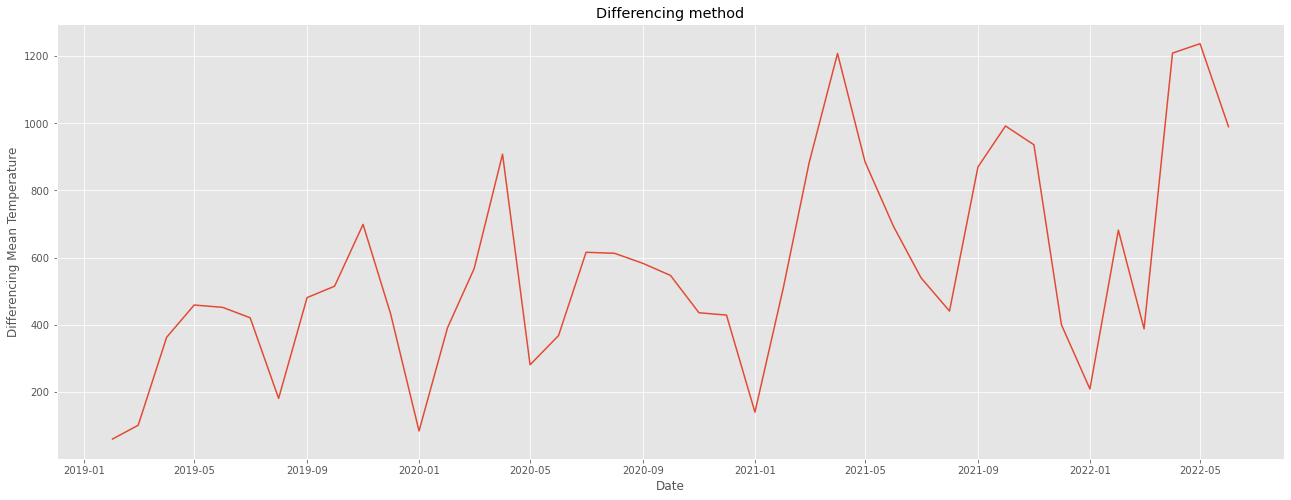

In [116]:
ts_diff = ts - ts.shift()
plt.figure(figsize = (22,8))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

In [117]:
result = adfuller(ts_diff[1:])
print("ADF Statistic : %f" % result[0])
print("p-value : %f" % result[1])
print("Critical Values : ")
for key, value in result[4].items():
    print('\t%s : %.3f' % (key,value))

ADF Statistic : -3.488325
p-value : 0.008292
Critical Values : 
	1% : -3.616
	5% : -2.941
	10% : -2.609


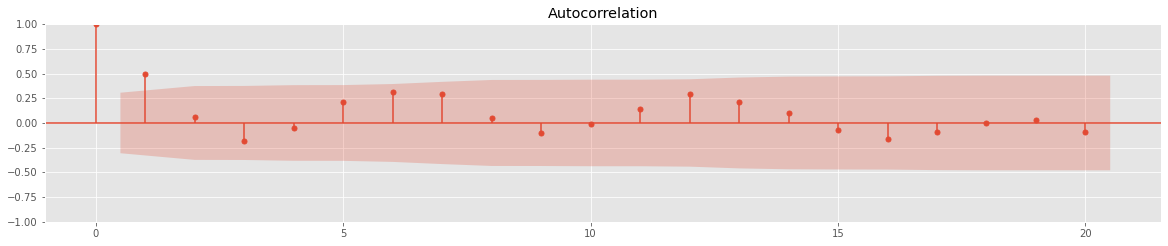

In [119]:
import statsmodels.api as sm

fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags=20, ax=ax1)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



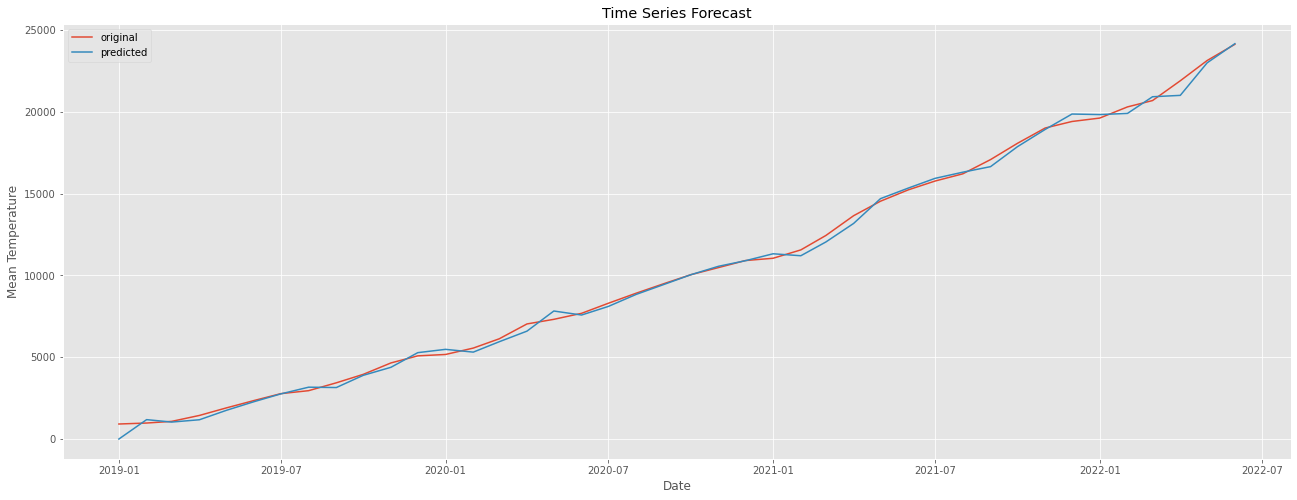

In [122]:
# ARIMA(3,1,0) 모델 결과
import statsmodels.api as sm
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(ts, order=(3,1,0))
model_fit = model.fit()

# predict
start_index = datetime(2019, 1, 1)
end_index = datetime(2022, 6, 1)
forecast = model_fit.predict(start = start_index, end = end_index, typ ='levels')

# visualization
plt.figure(figsize = (22,8))
plt.plot(df.Date, df.Count, label = "original")
plt.plot(forecast, label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


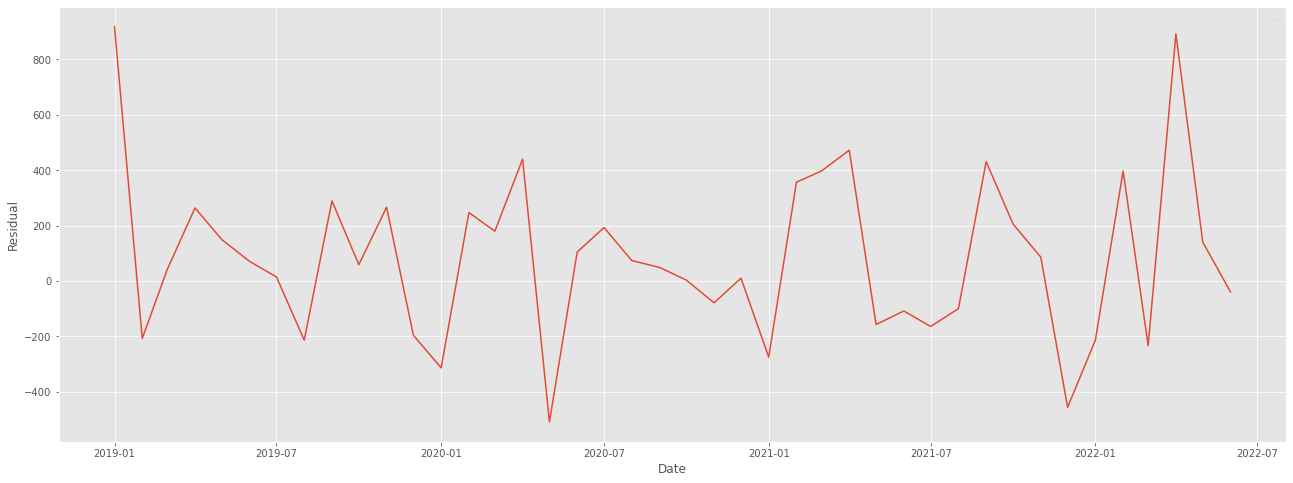

In [125]:
# 잔차분석
resi = np.array(df[df.Date>=start_index].Count) - np.array(forecast)

plt.figure(figsize = (22,8))
plt.plot(df.Date[df.Date>=start_index],resi)

plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.show()

In [126]:
result = adfuller(resi)
print("ADF Statistic : %f" % result [0])
print("p-value : %f" % result[1])
print("Critical Values : ")
for key, value in result[4].items() :
    print("\t%s : %.3f" % (key, value))

ADF Statistic : -4.009286
p-value : 0.001363
Critical Values : 
	1% : -3.627
	5% : -2.946
	10% : -2.612


error:  97788.87996628147


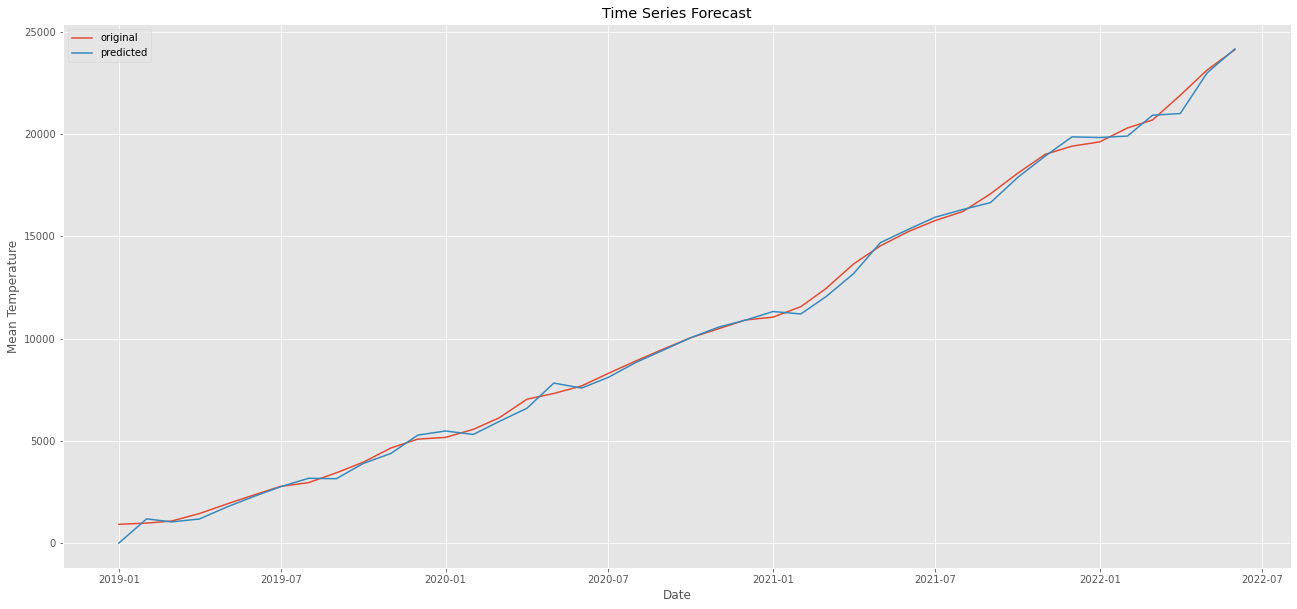

In [124]:
from sklearn.metrics import mean_squared_error

# fit model
forecast2 = model_fit.predict()
error = mean_squared_error(ts, forecast2)
print("error: " ,error)

# visualization
plt.figure(figsize=(22,10))
plt.plot(df.Date,df.Count,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.savefig('graph.png')

plt.show()